# Python for Psychologists - Session 9

## session8 recap & plotting

Python offers multiple "plotting" libraries, each of them with different features.

Today we want to cover two (probably the most common) libraries
- matplotlib
- seaborn 

A plot usually contains two main components, i.e., a figure and axes. Image the figure as a page on which you can draw whatever you like. Following that, a figure can contain multiple independent plots, a legend, color bar etc. The axes is the area where we plot our data and any labels are associated with. Each axes has a x and y -axis 

![fig](fig.png)

### matplotlib. 

- We can use basic matplotlib commands to easiliy create plots. 

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

`%matplotlib inline`

or 

`plt.show()` will show your plot instantly. The latter is particularly used outside jupyter notebooks

In [159]:
import numpy as np

x = np.linspace(0,10,20) # generates 20 numbers between 0 and 10 
y = x**2                 # x square 

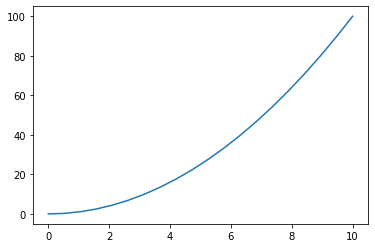

In [160]:
plt.plot(x,y)

Now that we got our first plot, let´s give it a name and label the x and y axis

Text(0, 0.5, 'y-axis')

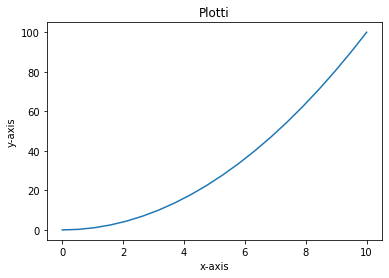

In [161]:
plt.plot(x,y)
plt.title("Plotti")
plt.xlabel("x-axis")
plt.ylabel("y-axis")

Now imagine you need more than one plot on your page. We can easily do this with `plt.subplot()`

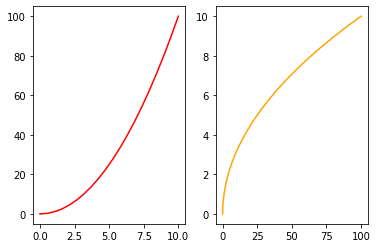

In [162]:
#nrows #ncolums #plot_number
plt.subplot(1,2,1) 
plt.plot(x,y,"red")

plt.subplot(1,2,2)
plt.plot(y,x,"orange")

- we could also plot by creating Figure objects in matplotlib

Let´s create an empty figure object with `.figure()` , i.e. an object oriented approach. By setting `figsize=(a,b)` one could increase or decrease ones "canvas"

In [167]:
fig = plt.figure(figsize=(3,4))

<Figure size 216x288 with 0 Axes>

Let´s add a blank set of axis using ``fig.add_axes([location_where_axes_should_be_located])``

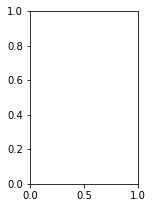

In [168]:
ax1 = fig.add_axes([0.1,0.1,0.5,0.6]) #left #bottom # widht #height  
fig

Remember that figure can contain more than just one plot. Let´s try to insert a second figure on our canvas. This will help us to understand the input `.add_axes([])` takes

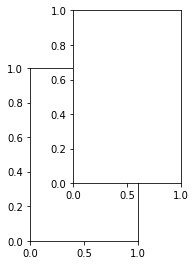

In [169]:
ax2 = fig.add_axes([0.3,0.3,0.5,0.6])
fig

Let´s plot our x and y arrays on our new blank axis and add x and y labels as well as a plot name. However, here we need to use e.g., `.set_xlabel` instead of just `.xlabel`

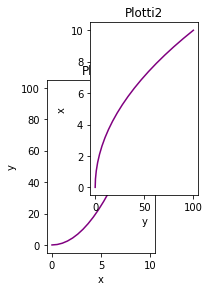

In [170]:
ax1.plot(x,y, "purple")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_title("Plotti1")

ax2.plot(y,x, "purple")
ax2.set_xlabel("y")
ax2.set_ylabel("x")
ax2.set_title("Plotti2")

fig


As for the first approach, we could also create multiple plots in the object oriented approach using `.subplots(nrows=, ncols=)` and **not** `.subplot()` as we did before! 

As we can see, we did create some overlap between our plots, no worris we can use `plt.tight_layout()` to solve this issue. Very conveniently, `plt.subplots()` will automatically add_axes based on the rows and colum input and you don´t have to specify it as we had to using `plt.figure()`

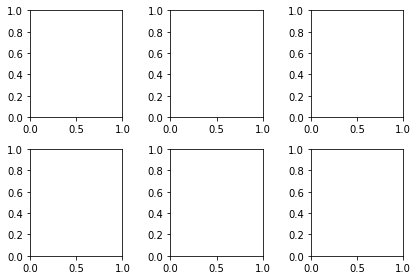

In [171]:
fig,ax = plt.subplots(nrows=2, ncols=3) 
plt.tight_layout()

Now we could try to plot our x & y arrays to specific subplots. We could do this by indexing ax! In some way, your subplot behaves as a single cell in your dataframe, i.e. we could index it easily by choosing [row/column]

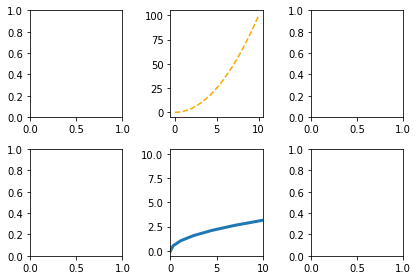

In [172]:
ax[0,1].plot(x,y, color="orange", linestyle="--") # changes color and linestyle 
ax[1,1].plot(y,x, linewidth=3) # changes the linewidth


ax[1,1].set_xlim([0,10]) #changes lower and upper bound of x axis

fig

### seaborn

seaborn is based on matplotlib, but usually works with less lines of codes and therefore provides a easy to handle vizualisation interface.

For further information, see https://seaborn.pydata.org/

In [173]:
import pandas as pd
iris = pd.read_csv("iris.csv", sep=",")
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


Let´s try to create a scatter plot with for sepal.length & sepal.width
- matplotlib
- seaborn

Text(0, 0.5, 'sepal.width')

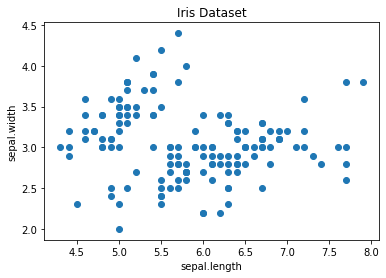

In [179]:
# create a figure and axis
fig, ax = plt.subplots()

# scatter the sepal_length against the sepal_width
ax.scatter(iris['sepal.length'], iris['sepal.width'])
# set a title and labels
ax.set_title('Iris Dataset')
ax.set_xlabel('sepal.length')
ax.set_ylabel('sepal.width')

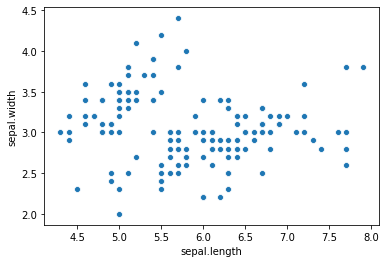

In [185]:
import seaborn as sns

sns.scatterplot(x='sepal.length', y='sepal.width', data=iris)

We could also group our scatterplot by variety using the ``hue`` argument, i.e. different groups will be colored in different numbers.

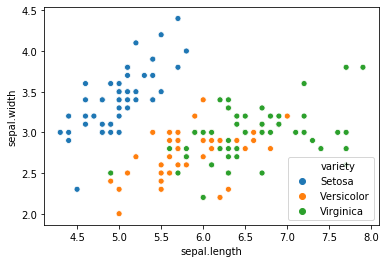

In [188]:
sns.scatterplot(x='sepal.length', y='sepal.width', hue="variety", data=iris)

We could easily plot a line chart using `sns.lineplot()`.  The only argument that we need are the four numeric columns in our case. 

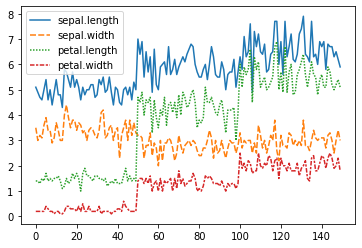

In [192]:
sns.lineplot(data=iris.drop(['variety'], axis=1))

We could also use ``sns.boxplot(x=,y=,data=)`` or ``sns.barplot(x=,y=,data=)`` to plot some characteristic of our three categories. The standard solution comes with a 95% confidence intervall around your point estimate. 

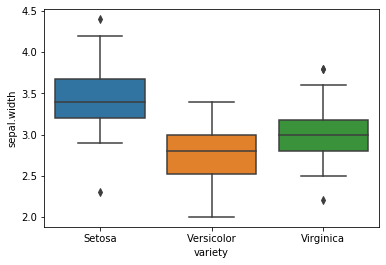

In [197]:
sns.boxplot(x="variety", y="sepal.width", data=iris)

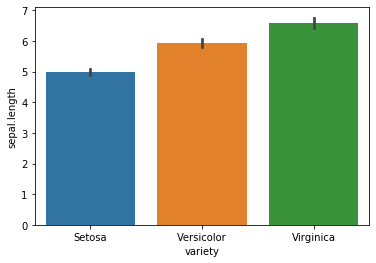

In [198]:
sns.barplot(x="variety", y="sepal.length", data=iris)

A nice way to to get a first idea about your data (from a plotting perspective) is `sns.pairplot()`

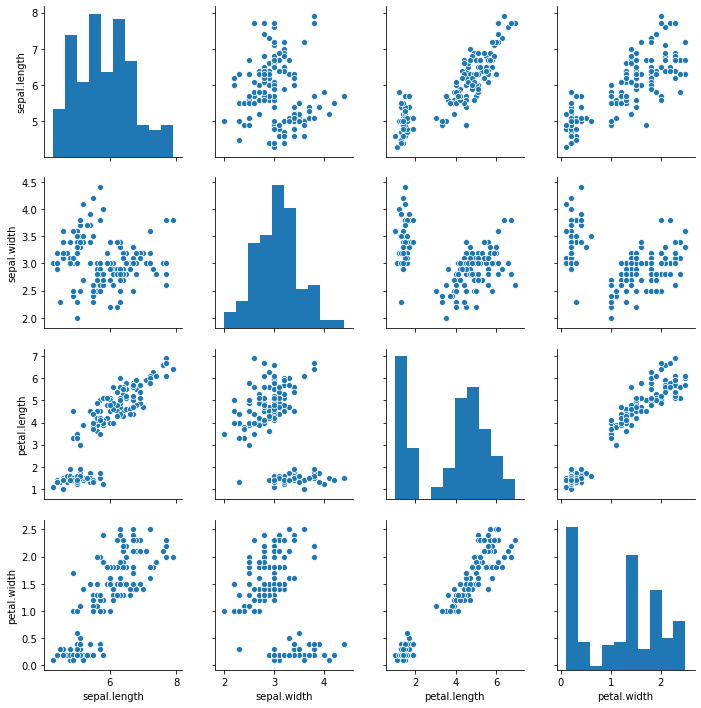

In [199]:
sns.pairplot(iris)

or `sns.heatmap()`

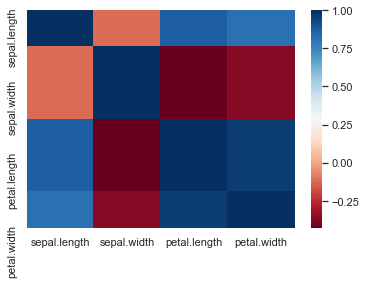

In [263]:
sns.heatmap(iris.corr(), cmap="RdBu")

As we can see, the output does not look that fine, here we can combine matplotlib and seaborn to customize our plot!

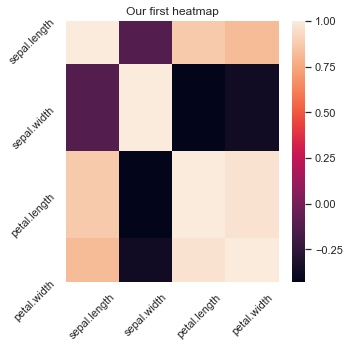

In [273]:
fig, ax = plt.subplots(figsize=(5,5))
ax = sns.heatmap(iris.corr(), cmap="rocket")


for tick in ax.get_xticklabels():
    tick.set_rotation(45)
for tick in ax.get_yticklabels():
    tick.set_rotation(45)
    
    
ax.set_title("Our first heatmap")
fig.tight_layout()

We could also break our data up across multiple subplots (i.e. *faceting*) and combine it into one single figure. First we can create a multiplot grid (i.e. ``sns.FacetGrid``) which takes our column variety into account and hence creates three empty grids. Afterwards we can use the ``.map()`` function, that calls the specified function for each object of an iterable (i.e., the empty grids in our case)

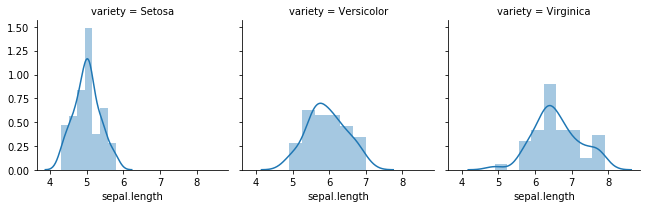

In [213]:
g = sns.FacetGrid(iris, col='variety')
g = g.map(sns.distplot, 'sepal.length') #plot a univariat distribution of observations

## Controlling figure aesthetics

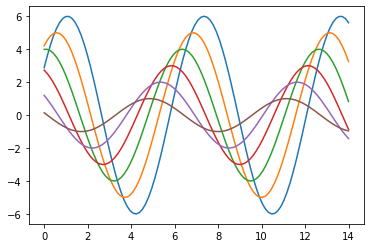

In [218]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)
        
sinplot()        

```sns.set_style()``` changes the figure theme, go check it out by using "darkgrid" or "whitegrid" or "white" or "ticks" or "dark" as an argument

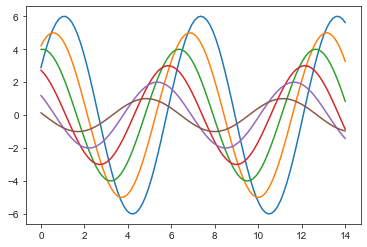

In [230]:
sns.set_style("ticks")
sinplot() 

We could also remove the top and right axis spine (only white or ticks thema can benefit from it) by using `sns.despine()`

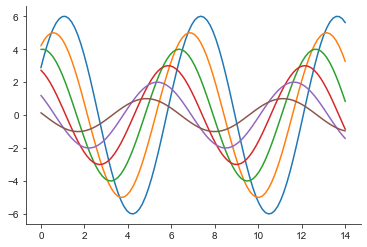

In [232]:
sinplot()
sns.despine()

We could also scale our plots for different context by using `sns.set_context()`. Go and try it for "paper", "notebook", "talk", and "poster".

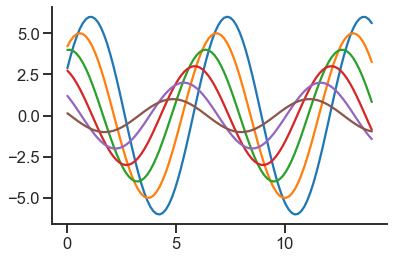

In [236]:
sns.set_context("paper")
sinplot()
sns.despine()

to switch back to the default seaborn settings, simply use `sns.set()`

In [241]:
sns.set()